In [4]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/infosys_internship_2025/US_Accidents.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

# Select only required columns
cols = ['City', 'State', 'Weather_Condition', 'Start_Time', 'End_Time', 'Severity']
df = pd.read_csv(file_path, usecols=cols, nrows=100000)

print(df.head())
print(df.info())


   Severity           Start_Time             End_Time          City State  \
0         3  2016-02-08 05:46:00  2016-02-08 11:00:00        Dayton    OH   
1         2  2016-02-08 06:07:59  2016-02-08 06:37:59  Reynoldsburg    OH   
2         2  2016-02-08 06:49:27  2016-02-08 07:19:27  Williamsburg    OH   
3         3  2016-02-08 07:23:34  2016-02-08 07:53:34        Dayton    OH   
4         2  2016-02-08 07:39:07  2016-02-08 08:09:07        Dayton    OH   

  Weather_Condition  
0        Light Rain  
1        Light Rain  
2          Overcast  
3     Mostly Cloudy  
4     Mostly Cloudy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Severity           100000 non-null  int64 
 1   Start_Time         100000 non-null  object
 2   End_Time           100000 non-null  object
 3   City               99999 non-null   object
 4   Sta

### Assignment-1

1. How many unique values are there in categorical columns like `City`, `State`, and `Weather_Condition`? Which category is the most frequent in each?

In [6]:
categorical_cols = ['City', 'State', 'Weather_Condition']

for col in categorical_cols:
    unique_count = df[col].nunique()
    most_freq = df[col].mode()[0]     # mode()[0] = most common value
    most_freq_count = df[col].value_counts().iloc[0]  # frequency of that value
    print(f"{col}:")
    print(f"  Unique Values = {unique_count}")
    print(f"  Most Frequent = {most_freq} (appears {most_freq_count} times)\n")

City:
  Unique Values = 785
  Most Frequent = Los Angeles (appears 9792 times)

State:
  Unique Values = 3
  Most Frequent = CA (appears 99272 times)

Weather_Condition:
  Unique Values = 43
  Most Frequent = Clear (appears 57255 times)



2. Calculate the percentage of missing values in each column and list columns with more than 5% missing data.

In [7]:
missing_percent = (df.isnull().sum() / len(df)) * 100

print("Missing Values (%):")
print(missing_percent)

# Columns with > 5% missing values
print("\nColumns with more than 5% missing values:")
print(missing_percent[missing_percent > 5])

Missing Values (%):
Severity             0.000
Start_Time           0.000
End_Time             0.000
City                 0.001
State                0.000
Weather_Condition    1.604
dtype: float64

Columns with more than 5% missing values:
Series([], dtype: float64)


3. Convert `Start_Time` and `End_Time` columns to datetime objects. Find the range (earliest and latest) of accident start times in the dataset.

In [8]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

# Find the range of accident start times
earliest_start = df['Start_Time'].min()
latest_start = df['Start_Time'].max()

print("Earliest Accident Start Time:", earliest_start)
print("Latest Accident Start Time:", latest_start)

Earliest Accident Start Time: 2016-02-08 05:46:00
Latest Accident Start Time: 2017-01-26 20:07:03


4. Identify any duplicate records in the dataset based on all columns. How many duplicates exist and how will you handle them?

In [9]:
duplicates = df.duplicated()  # Boolean Series (True = duplicate row)
num_duplicates = duplicates.sum()

print(f"Number of duplicate records: {num_duplicates}")

# Show a few duplicate rows (if any)
if num_duplicates > 0:
    print("\nExample duplicate rows:")
    display(df[duplicates].head())

    # Handling duplicates → Remove them
    df = df.drop_duplicates()
    print(f"\nDataset shape after removing duplicates: {df.shape}")

Number of duplicate records: 35

Example duplicate rows:


,Severity,Start_Time,End_Time,City,State,Weather_Condition
704,2,2016-03-17 11:10:37,2016-03-17 13:29:20,Dayton,OH,Partly Cloudy
4023,3,2016-07-24 08:09:03,2016-07-24 15:21:00,Oakland,CA,Clear
17910,2,2016-11-21 07:02:28,2016-11-21 07:32:02,Saint Helena,CA,Fog
20679,3,2016-09-17 14:14:04,2016-09-17 15:14:04,Sacramento,CA,Clear
27591,3,2016-08-17 09:14:48,2016-08-17 09:59:48,San Jose,CA,Haze



Dataset shape after removing duplicates: (99965, 6)


5. Explore the distribution of accident severity (Severity column). What percentage of accidents belong to each severity level? Visualize this distribution with a pie chart.

Percentage of accidents by severity level:

Severity
2    55.03
3    44.84
1     0.10
4     0.03
Name: proportion, dtype: float64


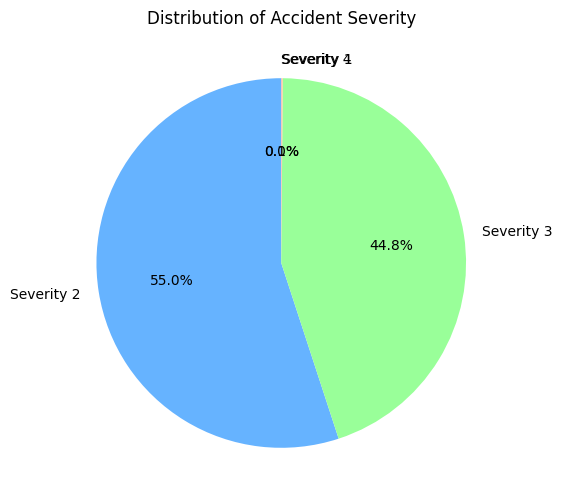

In [12]:
import matplotlib.pyplot as plt

# Q5: Percentage distribution of accident severity
severity_counts = df['Severity'].value_counts(normalize=True) * 100
print("Percentage of accidents by severity level:\n")
print(severity_counts.round(2))   # rounded to 2 decimals

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(severity_counts,
        labels=[f"Severity {i}" for i in severity_counts.index],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'])
plt.title("Distribution of Accident Severity")
plt.show()

